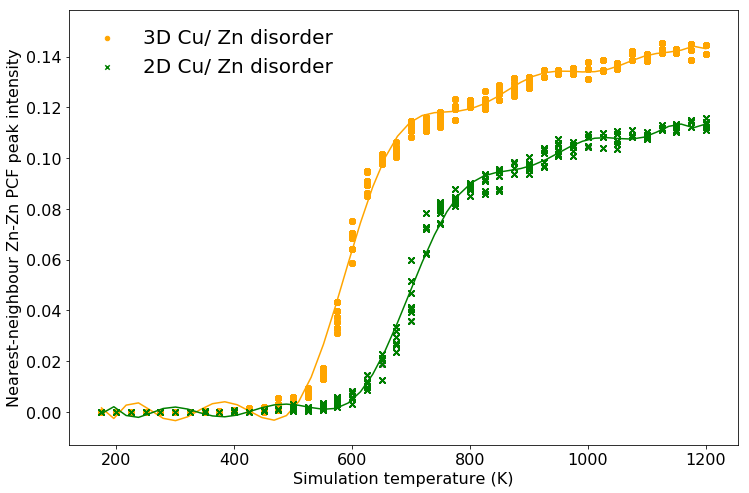

In [33]:
import sys
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os
from IPython.core.pylabtools import figsize
figsize(12, 8)

# Enter no. of re-runs
runs=5

# Combine data files for multiple runs
for f in glob.glob("3D/PCF_run*.dat"):
         os.system("cat "+f+" >> all_PCF_data_3D.dat")
### Add same again for 2D
for f in glob.glob("2D/PCF_run*.dat"):
         os.system("cat "+f+" >> all_PCF_data_2D.dat")


# Plot multiple systems together
file1= np.genfromtxt('3D/PCF_run1.dat', delimiter = ' ') # Single run to compare to
all_PCF_data_3D = np.genfromtxt('all_PCF_data_3D.dat', delimiter = ' ') # Combined data from all runs
### Add same again for 2D
file2= np.genfromtxt('2D/PCF_run1.dat', delimiter = ' ') # Single run to compare to
all_PCF_data_2D = np.genfromtxt('all_PCF_data_2D.dat', delimiter = ' ') # Combined data from all runs

plt.scatter(all_PCF_data_3D[:,0], abs(all_PCF_data_3D[:,1]), marker="o", color="orange",  s=20, label='3D Cu/ Zn disorder')
plt.scatter(all_PCF_data_2D[:,0], abs(all_PCF_data_2D[:,1]), marker="x", color="green",  s=20, label='2D Cu/ Zn disorder')

# Add polynomial line of best fit to all_data
x_3D = all_PCF_data_3D[:,0]
y_3D = all_PCF_data_3D[:,1]
### Add y2 for 2D? + edit below
x_2D = all_PCF_data_2D[:,0]
y_2D = all_PCF_data_2D[:,1]

# Polynomial fit for 3D Cu/ Zn disorder
z_3D = np.polyfit(x_3D, y_3D, 13) # deg of polynomial just chosen to give best shape to curve
f_3D = np.poly1d(z_3D)
x_new_3D = np.linspace(min(x_3D), max(x_3D), 50)
y_new_3D = f_3D(x_new_3D)
plt.plot(x_3D,y_3D,'o', x_new_3D, y_new_3D, color="orange")
# Polynomial fit for 2D Cu/ Zn disorder
z_2D = np.polyfit(x_2D, y_2D, 13) # deg of polynomial just chosen to give best shape to curve
f_2D = np.poly1d(z_2D)
x_new_2D = np.linspace(min(x_2D), max(x_2D), 50)
y_new_2D = f_2D(x_new_2D)
plt.plot(x_2D,y_2D,'x', x_new_2D, y_new_2D, color="green")


plt.legend(loc='upper right', frameon=False)
plt.rcParams.update({'font.size': 20})


plt.xlabel('Simulation temperature (K)')
plt.ylabel('Nearest-neighbour Zn-Zn PCF peak intensity')
plt.legend(frameon=False)

#plt.xlim([150,850])
plt.rcParams.update({'font.size': 16})

plt.savefig("PCF_3D+2D.png")
plt.show()

[  175.           175.85487907   176.70975813 ...,  1198.29024187
  1199.14512093  1200.        ]


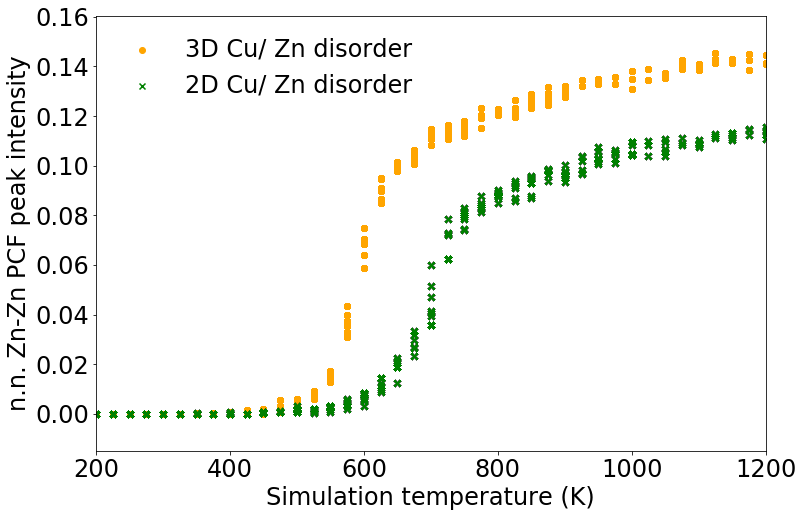

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from scipy.optimize import curve_fit
from IPython.core.pylabtools import figsize
figsize(12, 8)

# Combine data files for multiple runs
for f in glob.glob("3D/PCF_run*.dat"):
         os.system("cat "+f+" >> all_PCF_data_3D.dat")
### Add same again for 2D
for f in glob.glob("2D/PCF_run*.dat"):
         os.system("cat "+f+" >> all_PCF_data_2D.dat")

# Plot multiple systems together
all_PCF_data_3D = np.genfromtxt('all_PCF_data_3D.dat', delimiter = ' ') # Combined data from all runs
all_PCF_data_2D = np.genfromtxt('all_PCF_data_2D.dat', delimiter = ' ') # Combined data from all runs

plt.scatter(all_PCF_data_3D[:,0], all_PCF_data_3D[:,1], marker="o", color="orange", label='3D Cu/ Zn disorder')
plt.scatter(all_PCF_data_2D[:,0], all_PCF_data_2D[:,1], marker="x", color="green", label='2D Cu/ Zn disorder')

x_3D = all_PCF_data_3D[:,0]
x_2D = all_PCF_data_2D[:,0]
x_plot_3D = np.linspace(min(x_3D), max(x_3D), num=1200)
x_plot_2D = np.linspace(min(x_2D), max(x_2D), num=1200)
print(x_plot_3D)

def fsigmoid_lin(x, a, b, c, d, e):
    return 1.0 / (c + np.exp(-a*(x-b))) + (d*x**2+e)

def fsin(x, a, b,c):
    return a*np.sin(b*x)+c 

def farctan(x, a, b, c,d):
    return a * np.arctan(d*x-b) + c

def ftanh(x, a, b, c, d):
    return a * np.tanh(-d*x-b) + c

#popt, pcov = curve_fit(fsigmoid_lin, all_PCF_data_3D[:,0], abs(all_PCF_data_3D[:,1]), p0=[0.1, 700.0, 10.0, 1,2.0])
#print(popt)
#plt.plot(fsigmoid_lin(x_plot_3D, *popt))

#popt, pcov = curve_fit(fsin, all_PCF_data_3D[:,0], abs(all_PCF_data_3D[:,1]), p0=[0.15, 1, 700])
#plt.plot(fsin(x_plot_3D, *popt))

#popt, pcov = curve_fit(farctan, all_PCF_data_3D[:,0], abs(all_PCF_data_3D[:,1]), p0=[5., 650., 3.5,2.5])
#plt.plot(farctan(x_plot_3D-90, *popt), color='orange')

#popt, pcov = curve_fit(ftanh, all_PCF_data_3D[:,0], abs(all_PCF_data_3D[:,1]), p0=[0.5, 650., 0.05,2.5])
#plt.plot(ftanh(x_plot_3D, *popt), color='orange')



#popt, pcov = curve_fit(farctan, all_PCF_data_2D[:,0], abs(all_PCF_data_2D[:,1]), p0=[5., 650., 3.5,2.5])
#plt.plot(farctan(x_plot_2D-90, *popt), color='green')

plt.legend(loc='upper right', frameon=False)
plt.rcParams.update({'font.size': 24})


plt.xlabel('Simulation temperature (K)')
plt.ylabel('n.n. Zn-Zn PCF peak intensity')
plt.legend(frameon=False)

plt.xlim([200,1200])

plt.savefig("fig7_PCF_3D+2D_no_line.png")
plt.show()
